In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

# STEM for Creatives Week 4 - Audio

This week we will see how audio is represented on computers, how the properties of waveforms effect our perception of sound and how we can extract information from audio that will be useful in science (and data science) tasks. 

### Functions in Python 

Functions are great ways of encapsulating bits of code we want to reuse. 

We can think of this similarly to the way we use ``variables``, but instead of **storing a value or object** in a given place with a given name, we can store a **piece of code** in a given place with a given name.

We can also give the function **arguments** that will customise the behaviour each time we call it. These are named in brackets after the name of the function. We then put in the `:` and like with **for loops**, everything that is indented after this is part of the function.

Functions can also return values, for example, an array containing a sine wave! We just use the ```return``` keyword, and this acts as a break to method so things don't happen after you have returned. 

Functions don't have to return anything

In [ ]:
#Define the function first
def add(num1, num2):
    print("inside the function")
    return num1 + num2

print("outside the function")    

#Then use it
a = add(2, 4)
print(a)
a = add(2, 10)
print(a)
a = add(20, 400)
print(a)

#### Arguments 
The function above has two arguments, we give both arguments (num1 and num2) when we call the function. If we don't Python will complain. Python knows which argument we meant for each number because of the order we passed them (num1 first, num2 second).

However, sometimes arguments can be **optional**, and if we want this to be the case, we have to provide a default value which will be used. We can also have **named** arguments, if we want to specify which argument we are setting by name, not by order 

In [ ]:
#num1 is NOT optional, num2 and num3 have default values, they are optional
def maths(num1, num2=0, num3=1):
    print("(" + str(num1) + "+" + str(num2) + ")*" + str(num3))
    return (num1 + num2) * num3

#giving all arguments 
a = maths(2, 4, 3)
print(a)

#default value for num3
a = maths(2, 4)
print(a)

#default value for num2 and num3
a = maths(2)
print(a)

#default value for num2, num3 named
a = maths(2, num3 = 30)
print(a)

### Sine Waves

Below we see how the **frequency** and **amplitude** of a sine wave effect **pitch** and **volume**, and how **sample rates** fit into this in digital files.

In [ ]:
#Generate a sine wave at a given frequency and amplitude 
#amp, secs and sr have DEFAULT values, so if we dont give them when we call, it will use these instead
def sine_wave(freq, amp=1, secs=5, sr=44100):
    end = freq * secs * np.pi * 2
    x = np.linspace(0, end, int(secs * sr))    
    return np.sin(x) * amp

#Display an audio signal + play
#sr and xlim have DEFAULT values, so if we dont give them when we call, it will use these instead
def show_audio(y, sr=44100, xlim=5000):
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set_xlim(0,xlim)
    ax.set_ylim(-1,1)
    ax.plot(y)
    return ipd.Audio(y, rate=sr, normalize=False, autoplay=True)

In [ ]:
#What does np.linspace do? Remember you can always so ? for documentation 
?np.linspace

In [ ]:
##and ?? for source code
??np.linspace

In [ ]:
#Single sine wave at 440 (concert A)
sr = 44100
#first argument is frequency (not optional), second is named (sr)
sig = sine_wave(440,sr=sr)
print("we get " + str(len(sig)) + " samples for 5 seconds at 44100Hz")
show_audio(sig, sr)

In [ ]:
#Half frequency is an octave down
sr = 44100
sig = sine_wave(220,sr=sr)
show_audio(sig, sr)

In [ ]:
sig.shape

In [ ]:
#Amplitude effects volume
sr = 44100
sig = sine_wave(440,sr=sr,amp=0.2)
show_audio(sig, sr)

In [ ]:
#Changing the sample rate of the generated audio doesnt really effect the outcome ->
#(As long as we tell the player what we expect one sample of audio to represent timewise)
sr = 44100 / 2
sig = sine_wave(220,sr=sr)
show_audio(sig, sr)

In [ ]:
#Changing the sample rate of the player does
sr = 44100
sig = sine_wave(220,sr=sr)
show_audio(sig, sr / 2)

In [ ]:
##Adding two sine waves together
sr = 44100
sig = sine_wave(440,sr=sr,amp = 0.5)+sine_wave(440 * 2, sr=sr, amp = 0.5)
show_audio(sig, sr)

In [ ]:
#Adding multiple harmonics
#See how each harmonics is an integer ratio of the first harmonic (all acoustic sound is like this!)
#Adding harmonics the perceived pitch stays the same, the timbre (quality of the sound) changes
sr = int(44100)
f0 = 110
sig = sine_wave(f0, sr=sr)
num_harmonics = 5
harmonics = np.arange(2, num_harmonics) * f0
print(harmonics)
for h in harmonics:
    #Make all amplitudes lower
    sig = sig + sine_wave(h, sr=sr, amp = 1/num_harmonics)
show_audio(sig*0.9, sr)

### Librosa - Analysing Audio in Python

### Loading Samples

First, we're just going to use it to read in sound files, and maybe mess with their sample rates.

Using ```librosa.load()```, we get the sample data back as an array, as well as the sample rate of the file.

We'll then show you how you can manipulate the array and play it back and get some cool audio effects.

In [ ]:
#Install he library
!pip install librosa

In [ ]:
#Loading in sample file, returns an array containing the samples, as the sample rate 
drums, sr = librosa.load('../audio/drums0.wav')

In [ ]:
#How many samples? What sample rate? Unless you specify, librosa will automatically
#convert you sample to 22050
print(drums.shape, sr)
#How many seconds is that?
print(drums.shape[0] / sr)

In [ ]:
def show_audio(y, sr=44100, normalise=True):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_ylim(-1,1)
    librosa.display.waveplot(y, sr=sr, ax=ax)
    return ipd.Audio(y, rate=sr, normalize=normalise, autoplay=True)

In [ ]:
#Play the samples
show_audio(drums, sr)

In [ ]:
#We can change the volume
#Multiply all the samples by 0.2
sig = drums * 0.2
show_audio(sig, sr, False)

In [ ]:
#We can fade in
#Multiply the samples array by another array containing a ramp from 0->1
ramp = np.linspace(0,1,len(drums))
sig = drums * ramp
plt.plot(ramp)
show_audio(sig, sr)

In [ ]:
#We can play the sound backwards
#Just reverse the array
sig = np.flip(drums)
show_audio(sig, sr)

### Changing the playback rate 

GO TO SLIDES LOUIS

In [ ]:
#We can play at a different speed (lower sample rate = faster playback)
#Also half the length
sig = librosa.resample(drums, sr, sr/2)
show_audio(sig, sr)

In [ ]:
#We can play at a different speed (higher sample rate = slower playback)
#Also, twice the length
sig = librosa.resample(drums, sr, sr*2)
show_audio(sig, sr)

### Splicing 

We can replace values of an array with another array of the same size

We use the `:` notation to say "all of this row/column"

Or if used with another number **after** we say "everything up til this index"

Or if used with another number **before** we say "everything before this index"

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Replace all values of second column with new array 
a[:,1] = np.arange(3)
print("after \n", a)

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n", a)
#Replace all values of second row with new array 
a[1,:] = np.arange(10)
print("after \n", a)

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Replace first 5 values of second row with new array 
a[1,0:5] = np.arange(5)
print("after \n", a)

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Replace last 5 values of second row with new array 
a[1,5:] = np.arange(5)
print("after \n", a)

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Take first 5 values of second row and multiply by 100, then put back into array
a[1,:5] = a[1,:5]*100
print("after \n", a)

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Take last 5 values of second row and multiply by another array of the same size, then put back into array
a[1,5:] = a[1,5:] * [1,4,8,16,32]
print("after \n", a)

In [ ]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Take last 5 values of second row and multiply by another array of the same size, then put back into array
b = [1,4,8,16,32]
a[1,-len(b):] = a[1,-len(b):] * b
print("after \n", a)

### Once more, with feeling (and audio)

We're going to start chopping up our sample and putting it back together. In order to do this its nice to have an idea of musical intervals. 

This drum beat is two bars, each consisting of 4 beats. We can work out these intervals in samples and then use this to chop up the drums!

One important thing to remember is the new audio data we put in **must** be the same length as the slot we want to put it in.

In [ ]:
#All the indexes we use are in SAMPLES
bar = len(drums)/2
#4 beats in a bar
beat = int(bar / 4)
#for semi-quavers (sq) in a beat
sq = int(beat / 4)
bar, beat, sq

In [ ]:
#take the drum roll that happens on the second beat. 
#Get audio data from beat*2 => beat*3 using the : sign
drum_roll = drums[beat*2:beat*3]
show_audio(drum_roll, sr)

In [ ]:
#first take the whole drum break (MUST COPY)
sig = drums.copy()
#Overwrite new locations in original with the drum roll
print("replacing " + str((beat*2) - (beat*1)) + " samples with " + str(len(drum_roll)))
sig[beat*1:beat*2] = drum_roll
sig[beat*4:beat*5] = drum_roll
sig[beat*6:beat*7] = drum_roll
show_audio(sig, sr)

In [ ]:
#first take the whole drum break (MUST COPY)
sig = drums.copy()
#reverse the last 2 beats
#overwrite the 2 lasts beats worth of audio data with the reverse of it
print("replacing " + str((beat*8) - (beat*6)) + " samples with " + str((beat*8) - (beat*6)))
sig[beat*6:beat*8] = np.flip(sig[beat*6:beat*8])
show_audio(sig, sr)

In [ ]:
sig = drums.copy()
#Get first half beat
kick = drums[0:int(beat/2)]
#Slow to half speed, which also makes it twice as long
#Now a whole beat in length
low_kick = librosa.resample(kick, sr, sr*2)
print("replacing " + str((beat*(0+1)) - (beat*0)) + " samples with " + str(len(low_kick)))
for i in [0,2,4,6]:
    #Overwrite low_kick audio data on every other beat
    sig[beat*i:beat*(i+1)] = low_kick
show_audio(sig, sr)

### Multiple Samples

We'll now introduce some more samples and show how we can **combine** as well as **overwrite**. 

In [ ]:
guitar, sr = librosa.load('../audio/guitar.wav')
#guitar sample is twice as long so trim
half_guitar = guitar[0:len(drums)]

In [ ]:
#Combine (using +) them together. NOT overwrite.
sig = drums + half_guitar
show_audio(sig, sr)

### Multi Channel

If we have a 2D array with two channels of audio, we can do stereo!

In [ ]:
#Make an array with the two samples, one in each channel
#drums on left [0], guitar on right [1]
sig = np.array([drums,half_guitar])
show_audio(sig, sr)

In [ ]:
#Load in 8 drum breaks
multi_drums = np.array([librosa.load('../audio/drums' + str(i) +'.wav')[0] for i in range(8)])
print(multi_drums.shape)
#Load in 2 drum vocal samples
vocals = np.array([librosa.load('../audio/vocal' + str(i) +'.wav')[0] for i in range(2)])

## Putting it all together for some #algorave goodness

### Loops over time

We are going to start stringing some of these changes together into a **sequence** to make a longer audio composition through collaging **audio data** from existing audio files. 

Starting from a blank array to hold our new composition, we will step through at **musically meaningful intervals** and at each point decide what **audio data to add in**. 

For example, we could write some code to take the first beat of **4 different drum samples** and chain them together.

```
#step 1
my_track[0:beat] = multi_drums[0][0:beat]

#step 2
my_track[1*beat:beat*2] = multi_drums[1][0:beat]

#step 3
my_track[2*beat:beat*3] = multi_drums[2][0:beat]

#step 4
my_track[3*beat:] = multi_drums[3][0:beat]

```

However, if we want to do something over time and **not hand write new code every step**, we can use a control structure common in lots of coding, and especially useful in **time based media** 

* Audio


* Video 


* Games 


### For Loops

The code underneath dictates what repeated actions we do with ``i`` each time and **must** be indented with a tab, otherwise Python will complain. 

This can be a single line code, or multiple lines. Every line that is indented will be included in the loop and executed each time.

`for i in array:
    do_something_with_i 
#end of loop
`
    
`for i in array:
     do_something_with_i
     do_something_else_with_i
     do_another_thing
#end of loop
`  

With this we can now write **one piece of code** that grabs some audio and places it in our **new track**, and get the ``for loop`` to execute this **multiple times**, each time **moving forwards** to a new position

In [ ]:
multi_drums.shape

In [ ]:
#Empty array with one channels, with enough space to hold 1 bars worth of audio samples
num_beats = 8
track_length = beat * num_beats
#Start with silence (0's)
my_track = np.zeros(track_length)
for i in range(num_beats):
    start = i * beat
    end = (i+1) * beat
    print(i, start, end)
    #Use i to pick a new insert position, and new source drum beat
    my_track[start:end] = multi_drums[i][0:beat]
print("finished, playing track")
show_audio(my_track, sr)

### Random Variation

In the track above, on every iteration of the ``for-loop`` we make **3 compositional choices**


1. Where to insert the audio into our blank new track


2. Which source drum beat to take the audio from 


3. Where in the source drum beat to take the audio from 


The first one we take from the `i` variable. It makes sense to keep this as we are using the `for-loop` to represent time moving forwards. 


The second and third, we have hardcoded, but it can be interesting to instead pick a ``random value``.

Now, **every iteration of the for loop** will chop a new drum beat a new place. We can make this go for as long as we want!

In [ ]:
#Empty array with one channels, with enough space to hold 1 bars worth of audio samples
num_beats = 8
num_drums = len(multi_drums)
track_length = beat * num_beats
#Start with silence (0's)
my_track = np.zeros(track_length)
for i in range(num_beats):
    start = i * beat
    end = (i+1) * beat
    #get random drum beat (8 drums to choose from)
    source_drum = np.random.randint(num_drums)
    #get random start point (4 beats to choose from)
    source_drum_start = np.random.randint(4) * beat
    source_drum_end = source_drum_start + beat
    print("inserting from", source_drum, source_drum_start, source_drum_end)
    print("into", i, start, end)
    my_track[start:end] = multi_drums[source_drum][source_drum_start:source_drum_end]
print("finished, playing track")
show_audio(my_track, sr)

### (Pseudo) Random Numbers and Weighted Choices

The random method we have used generates from a **uniform distribution**, meaning that there is an equal chance that any of the possible numbers will be generated. 

We can see below that when we generate 10000 numbers, then plot it on a histogram, each bar is approximately the same. 

This is why when we use it for making choices in algorithms, we can be fairly sure about probability of certain actions happening e.g. 

```
#10% chance
if np.random.rand() > 0.9:
    do_something()
```

In [ ]:
##Histogram of uniformly distributed random floats
a = plt.hist([np.random.rand() for i in range(10000)])

### A stochastic composition

Here we add use one `for-loop` with a bunch of different **probability based choices** inside. 

At each time step we some source audio, and some editting effects, and gradually build up our **generative composition**.

In [ ]:
track_length = int(bar * 8)
#Start with silence (0's)
sig = np.array([np.zeros(track_length), np.zeros(track_length)])

#Length of each chop (smaller number is more frequent chops)
chop = 1/8
chop_size = int(len(multi_drums[0]) * chop)
n = int(track_length/chop_size)
#Pick a random drum break and location
drum_index = np.random.randint(len(multi_drums))
chop_at = np.random.randint(1/chop)*chop_size


for i in range(n):
    
    #65% chance of picking new drums
    if np.random.rand() > 0.35:
        #Pick a random drum break and location
        drum_index = np.random.randint(len(multi_drums))
        chop_at = np.random.randint(1/chop)*chop_size
        
    #Get a section of that drum break
    new_drums = multi_drums[drum_index, chop_at:chop_at+chop_size]
    
    #10% chance of reversing
    if np.random.rand() > 0.9:
        new_drums = np.flip(new_drums)
        
    #10% chance of speeding up
    if np.random.rand() > 0.9:
        #twice the pitch, half the length
        new_drums = librosa.resample(new_drums, sr, sr/2)
        
    #10% chance of slowing down up
    if np.random.rand() > 0.9:
        #half the pitch, twice the length
        new_drums = librosa.resample(new_drums, sr, sr*2)
        new_drums = new_drums[0:chop_size]
        
    #Pick channel
    chan = np.random.randint(2)
    
    #Overwrite with new drums
    start = i*chop_size
    end = start + len(new_drums)
    sig[chan,start:end] = new_drums

##Add vocals    
for i in range(n):
    #10% chance of adding in vocal sample
    if np.random.rand() > 0.9:
        #Pick a sample
        vox = vocals[np.random.randint(len(vocals))]
        start = i*chop_size
        end = start+len(vox)
        #Make sure we dont go off the end
        if end < len(sig[0]):
            #Pick channel
            chan = np.random.randint(2)
            #Adding (not overwrite)
            sig[chan,start:end] = sig[chan][start:end] + vox

#Add the guitar at the end (not overwrite)
#Slice the audio from the end back to the length of the guitar, then add guitar audio and put back
#We add to both channels using the : and broadcasting (more on that next week)
sig[:,-len(guitar):] = sig[:,-len(guitar):] + guitar    
show_audio(sig, sr)

## Audio Features

Librosa is a library used for analysing audio in Python. In its raw form and just loads of samples, audio is not particularly useful for conducting experiments or building machine learning systems. 

- What different frequencies are present?
- What are the timbral qualities of the sound?
- Where are the main percussive events?
- Whats the tempo?
- Where are the beats?
- What instruments are playing?

Librosa is what will tell us these things.

We begin with the humble FFT.  We usually calculate audio features things over small, overlapping windows and end up with more informative data about the audio, in smaller amounts (40 things per second, rather 44100).

Doing the incredibly useful job of telling what spectral content is present in a given sound, the Fast Fourier Transform is the foundation for large amounts of audio analysis. For a small window of time, we are able to get the strength of different frequencies present between various ranges, or bins. 

The number of bins we get, and how much frequency they each cover, is a factor of the size of the window we analyse. As such, we must make a choice between resolution in the time domain (smaller windows allow us to spot shorter changes in the input signal), and resolution in the frequency domain (smaller bands allow us to be more specific about which frequencies are present). 

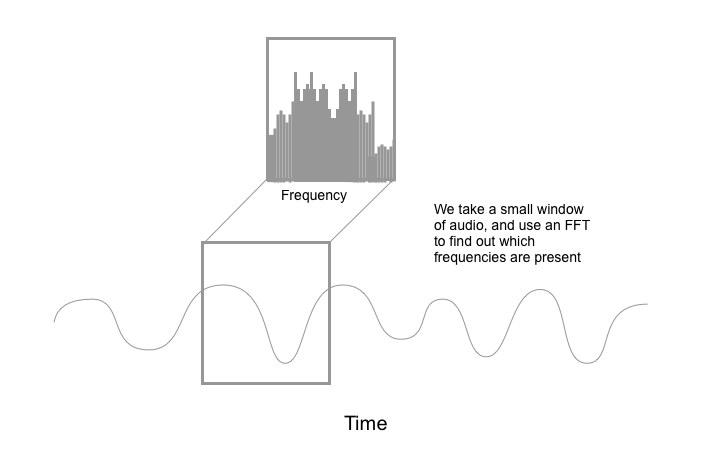

In [2]:
from IPython.display import Image
Image(filename='../images/fft.png') 

In [ ]:
?librosa.stft

In [ ]:
def show_audio(y, sr=44100, fft_size = 2048):
    fig, ax = plt.subplots(ncols=2,figsize=(16,4))
    #Show waveform
    librosa.display.waveplot(y, sr=sr, ax=ax[0])
    #Get FFT
    S = np.abs(librosa.stft(y,fft_size))
    #Show FFT
    librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
    return ipd.Audio(y, rate=sr, autoplay=True)

In [ ]:
#Note the logarithmic scale in the y axis
y, sr = librosa.load('audio/soul_piano.wav')
show_audio(y, sr)

In [ ]:
y, sr = librosa.load('audio/vocal1.wav')
show_audio(y, sr)

In [ ]:
#low frequency resolution, high time resolution
show_audio(y, sr, 256)

In [ ]:
#high frequency resolution, low time resolution
show_audio(y, sr, 2048*4)

### Getting musical information 

If what we are examining is music, which it may well be because that's what we creative types are like, there are a whole set of descriptors available to us concerning its various musicological or perceptual qualities. 

Often these take the output of an initial preprocessing step (like the FFT) and then apply ideas of musical theory to calculate new features. The hierarchical structure of much Western music means these features can also build from one another. Onsets may lead into beats, which may lead into ideas of bar lines and tempos. Analysis of pitches may then lead into identification of chords and keys. 


We can use Librosa to get loads of different musical data about an audio file. 

Here we see how we can get the tempo and beats for a given track. We have superimposed the beats that librosa thinks the beats are in this track. Its works reasonably well for this example, but not necessarily for all music. 

In [ ]:
# Sonify detected beat events
y, sr = librosa.load(librosa.ex('choice'), duration=10)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
y_beats = librosa.clicks(frames=beats, sr=sr, length = len(y))
show_audio(y + y_beats, sr)